# MNIST dataset
## Modified National Institute of Standards and Technology database
This notebook explores the MNIST dataset with basic ML libraries.

In [96]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [97]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [98]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
print(f'{x_train.shape=}')
print(f'{y_train.shape=}')
print(f'{x_test.shape=}')
print(f'{y_test.shape=}')

x_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
x_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


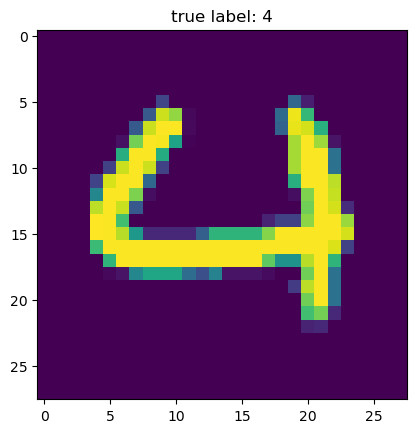

In [100]:
example = 60

# plt.imshow(x_train[example,:,:], cmap=plt.cm.binary) # black/white
plt.imshow(x_train[example,:,:])
plt.title(f'true label: {y_train[example]}')
plt.show()

## reshaping and scaling image data

In [101]:
x_train_reshaped_scaled = x_train.reshape((x_train.shape[0], -1)).astype("float32")/x_train.max()
x_test_reshaped_scaled = x_test.reshape((x_test.shape[0], -1)).astype("float32")/x_test.max()

In [102]:
x_train = x_train_reshaped_scaled
x_test = x_test_reshaped_scaled

In [103]:
print(f'{x_train.shape=}')
print(f'{x_test.shape=}')

x_train.shape=(60000, 784)
x_test.shape=(10000, 784)


## One-Hot-Endcoding labels

In [104]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## creating the neural network

In [170]:
model = keras.models.Sequential()

model.add(layers.Dense(
    512, 
    activation = "relu", 
    input_shape = (28*28, )
))

model.add(layers.Dense(
    32, 
    activation = "relu", 
    input_shape = (28*28, )
))

model.add(layers.Dense(
    16, 
    activation = "relu", 
    input_shape = (28*28, )
))

# using softmax for multiclass classification and probability
model.add(layers.Dense(
    10, 
    activation = "softmax"
))

In [171]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 32)                16416     
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 10)                170       
                                                                 
Total params: 419,034
Trainable params: 419,034
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(
    optimizer= "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [173]:
model.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=32,
)

Epoch 1/8
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2435 - accuracy: 0.9287
Epoch 2/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0960 - accuracy: 0.9707
Epoch 3/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0654 - accuracy: 0.9794
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0464 - accuracy: 0.9850
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 7/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 8/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0221 - accuracy: 0.9926


In [174]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1025 - accuracy: 0.9747


In [175]:
print(f"test_loss :\t{test_loss*100:.3}%")
print(f"test_accuracy :\t{test_accuracy*100:.3}%")

test_loss :	10.2%
test_accuracy :	97.5%
